In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Data preparation

In [2]:
df=pd.read_csv('/Users/Jeff/Downloads/acs2015_county_data.csv')

In [3]:
df.head()

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,...,0.5,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6
1,1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,...,1.0,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5
2,1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,...,1.8,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6
3,1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,...,0.6,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3
4,1009,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,...,0.9,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7


In [4]:
df.columns

Index(['CensusId', 'State', 'County', 'TotalPop', 'Men', 'Women', 'Hispanic',
       'White', 'Black', 'Native', 'Asian', 'Pacific', 'Citizen', 'Income',
       'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment'],
      dtype='object')

1. We will predict Unemployment
2. CensudId, State, County will be dropped since they don't bring any useful information
3. TotalPopulation is kept we normalize the gender

In [5]:
df.drop(['CensusId','State','County'], axis=1, inplace=True)

In [6]:
df.drop('Men', axis=1, inplace=True)

In [7]:
df.Women=df.Women/df.TotalPop

In [8]:
df.Citizen=df.Citizen/df.TotalPop

In [9]:
df.Employed=df.Employed/df.TotalPop

In [10]:
df.isna().sum()

TotalPop           0
Women              0
Hispanic           0
White              0
Black              0
Native             0
Asian              0
Pacific            0
Citizen            0
Income             1
IncomeErr          1
IncomePerCap       0
IncomePerCapErr    0
Poverty            0
ChildPoverty       1
Professional       0
Service            0
Office             0
Construction       0
Production         0
Drive              0
Carpool            0
Transit            0
Walk               0
OtherTransp        0
WorkAtHome         0
MeanCommute        0
Employed           0
PrivateWork        0
PublicWork         0
SelfEmployed       0
FamilyWork         0
Unemployment       0
dtype: int64

In [11]:
df.shape

(3220, 33)

In [12]:
df.dropna(inplace=True)

In [13]:
df.isna().sum()

TotalPop           0
Women              0
Hispanic           0
White              0
Black              0
Native             0
Asian              0
Pacific            0
Citizen            0
Income             0
IncomeErr          0
IncomePerCap       0
IncomePerCapErr    0
Poverty            0
ChildPoverty       0
Professional       0
Service            0
Office             0
Construction       0
Production         0
Drive              0
Carpool            0
Transit            0
Walk               0
OtherTransp        0
WorkAtHome         0
MeanCommute        0
Employed           0
PrivateWork        0
PublicWork         0
SelfEmployed       0
FamilyWork         0
Unemployment       0
dtype: int64

In [14]:
df.describe().T.round()

,count,mean,std,min,25%,50%,75%,max
TotalPop,3218.0,99471.0,319395.0,267.0,11225.0,26080.0,66458.0,10038388.0
Women,3218.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
Hispanic,3218.0,11.0,19.0,0.0,2.0,4.0,10.0,100.0
White,3218.0,75.0,23.0,0.0,64.0,84.0,93.0,100.0
Black,3218.0,9.0,14.0,0.0,0.0,2.0,10.0,86.0
Native,3218.0,2.0,7.0,0.0,0.0,0.0,1.0,92.0
Asian,3218.0,1.0,3.0,0.0,0.0,0.0,1.0,42.0
Pacific,3218.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0
Citizen,3218.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
Income,3218.0,46124.0,12908.0,10499.0,38191.0,44748.0,52059.0,123453.0


In [15]:
df.corr().Unemployment.sort_values()

Employed          -0.698771
IncomePerCap      -0.547239
White             -0.540146
Income            -0.509054
WorkAtHome        -0.309747
Professional      -0.300318
SelfEmployed      -0.293592
IncomePerCapErr   -0.251561
IncomeErr         -0.226349
FamilyWork        -0.123187
PrivateWork       -0.104118
Construction      -0.091779
Walk              -0.080272
Asian             -0.055315
Pacific           -0.015888
Citizen            0.005613
TotalPop           0.030313
Transit            0.030784
Production         0.079907
Carpool            0.088236
Drive              0.096529
Women              0.105154
OtherTransp        0.117109
Office             0.161331
Native             0.187386
MeanCommute        0.292585
PublicWork         0.312533
Hispanic           0.321536
Black              0.352943
Service            0.365371
ChildPoverty       0.678441
Poverty            0.712419
Unemployment       1.000000
Name: Unemployment, dtype: float64

<AxesSubplot:>

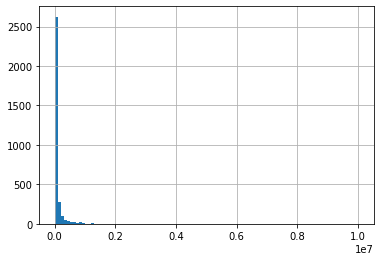

In [16]:
df.TotalPop.hist(bins=100)

<AxesSubplot:>

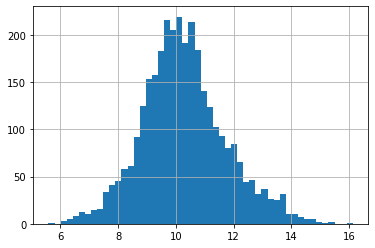

In [17]:
df.TotalPop.apply(np.log).hist(bins=50)

In [18]:
df.TotalPop=df.TotalPop.apply(np.log)

<AxesSubplot:>

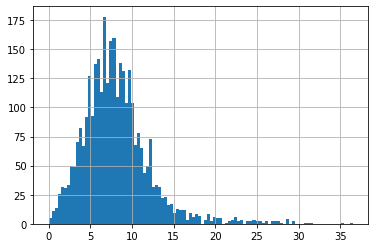

In [19]:
df.Unemployment.hist(bins=100)

<AxesSubplot:>

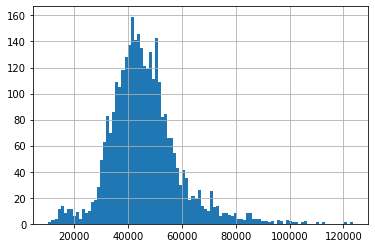

In [20]:
df.Income.hist(bins=100)

<AxesSubplot:>

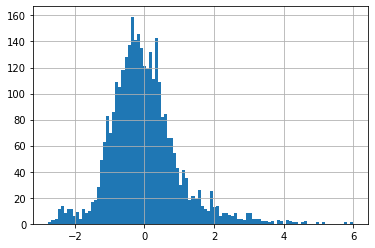

In [21]:
((df.Income-df.Income.mean())/df.Income.std()).hist(bins=100)

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler=StandardScaler()

In [24]:
scaler.fit(df[['Income']])

StandardScaler()

In [25]:
scaler.transform(df[['Income']])

array([[ 0.39959818],
       [ 0.3200254 ],
       [-1.01961757],
       ...,
       [-2.19314171],
       [-2.36290214],
       [-2.43410699]])

(array([  1.,   3.,   4.,  11.,  14.,   8.,  11.,  11.,   6.,   9.,   4.,
         11.,   8.,  10.,  17.,  18.,  28.,  49.,  63.,  83.,  70.,  86.,
        109., 105., 118., 128., 137., 159., 141., 146., 135., 121., 119.,
        132., 111., 143., 109.,  82.,  84.,  66.,  66.,  54.,  43.,  30.,
         41.,  35.,  18.,  21.,  19.,  26.,  14.,  11.,  10.,  25.,  13.,
         14.,   6.,   8.,   8.,   7.,   6.,   8.,   4.,   4.,   3.,   8.,
          8.,   4.,   4.,   4.,   2.,   2.,   1.,   2.,   0.,   3.,   2.,
          0.,   3.,   2.,   1.,   1.,   0.,   1.,   2.,   0.,   0.,   0.,
          1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          1.]),
 array([-2.76022366, -2.672706  , -2.58518834, -2.49767069, -2.41015303,
        -2.32263537, -2.23511771, -2.14760005, -2.06008239, -1.97256473,
        -1.88504707, -1.79752942, -1.71001176, -1.6224941 , -1.53497644,
        -1.44745878, -1.35994112, -1.27242346, -1.1849058 , -1.09738814,
        -1.00987049, -0.92

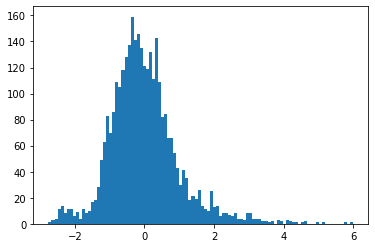

In [26]:
plt.hist(scaler.transform(df[['Income']]), bins=100)

In [27]:
scaler=StandardScaler()

In [28]:
df.loc[:, 'Income':'IncomePerCapErr']=scaler.fit_transform(df.loc[:, 'Income':'IncomePerCapErr'])

# Feature Selection

## Filters

In [29]:
from sklearn.feature_selection import SelectKBest, f_regression

In [30]:
y=df.Unemployment
X=df.drop('Unemployment', axis=1)

In [31]:
X.shape

(3218, 32)

In [32]:
selector=SelectKBest(f_regression, k=6)

In [33]:
selection=selector.fit_transform(X,y)

In [34]:
pd.DataFrame(selection).head()

,0,1,2,3,4,5
0,75.8,0.399598,0.161477,12.9,18.6,0.434364
1,83.1,0.320025,0.539857,13.4,19.2,0.440511
2,46.2,-1.019618,-1.154696,26.7,45.3,0.319211
3,74.5,-0.576892,-0.895176,16.8,27.9,0.366926
4,87.9,-0.024067,-0.555878,16.7,27.2,0.384491


In [35]:
X.head()

,TotalPop,Women,Hispanic,White,Black,Native,Asian,Pacific,Citizen,Income,...,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork
0,10.919099,0.515673,2.6,75.8,18.5,0.4,1.0,0.0,0.737491,0.399598,...,0.1,0.5,1.3,1.8,26.5,0.434364,73.6,20.9,5.5,0.0
1,12.181375,0.511513,4.5,83.1,9.5,0.6,0.7,0.0,0.756941,0.320025,...,0.1,1.0,1.4,3.9,26.4,0.440511,81.5,12.3,5.8,0.4
2,10.201070,0.461718,4.6,46.2,46.7,0.2,0.4,0.0,0.769122,-1.019618,...,0.4,1.8,1.5,1.6,24.1,0.319211,71.8,20.8,7.3,0.1
3,10.025882,0.465891,2.2,74.5,21.4,0.4,0.1,0.0,0.773978,-0.576892,...,0.5,0.6,1.5,0.7,28.8,0.366926,76.8,16.1,6.7,0.4
4,10.963186,0.505944,8.6,87.9,1.5,0.3,0.1,0.0,0.733755,-0.024067,...,0.4,0.9,0.4,2.3,34.9,0.384491,82.0,13.5,4.2,0.4


This selection selected White, Income, IncomePerCap, employed, poverty and childpoverty

In [36]:
df.corr().Unemployment.map(abs).sort_values().tail(7)

Income          0.509054
White           0.540146
IncomePerCap    0.547239
ChildPoverty    0.678441
Employed        0.698771
Poverty         0.712419
Unemployment    1.000000
Name: Unemployment, dtype: float64

In [37]:
from statsmodels.api import OLS, add_constant

In [38]:
OLS(y, add_constant(selection)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Unemployment   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     813.6
Date:                Tue, 06 Oct 2020   Prob (F-statistic):               0.00
Time:                        11:45:36   Log-Likelihood:                -7613.4
No. Observations:                3218   AIC:                         1.524e+04
Df Residuals:                    3211   BIC:                         1.528e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.4132      0.653     26.684      0.000      16.134      18.693
x1            -0.0209      0.003     -7.440      0.000      -0.026      -0.015
x2             0.5813      0.114      5.086      0.000       0.357       0.805
x3             0.2835      0.111      2.556      0.011       0.066       0.501
x4             0.2337      0.017     13.432      0.000       0.200       0.268
x5            -0.0058      0.011     -0.516      0.606      -0.028       0.016
x6           -27.2099      1.120    -24.304      0.000     -29.405     -25.015
==============================================================================
Omnibus:                      310.476   Durbin-Watson:                   1.655
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1940.676
Skew:                          -0.215   Prob(JB):                         0.00
Kurtosis:                       6.780   Cond. No.                     2.29e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Wrappers

In [40]:
pip install mlxtend

### RFE

In [42]:
from sklearn.feature_selection import RFE
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [43]:
from sklearn.linear_model import LinearRegression

In [45]:
estimator=LinearRegression()
selector_w1=RFE(estimator, n_features_to_select=6)
selector_w1.fit(X,y)

RFE(estimator=LinearRegression(), n_features_to_select=6)

In [46]:
selector_w1.ranking_

array([ 1,  1, 24, 27, 23, 21, 26, 25,  1,  1, 19, 17, 18,  5, 22, 16, 14,
       12, 15, 13,  6,  9,  7, 10, 11,  8, 20,  1,  3,  4,  1,  2])

In [47]:
selector_w1.support_

array([ True,  True, False, False, False, False, False, False,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False,  True, False])

In [48]:
X.columns[selector_w1.support_]

Index(['TotalPop', 'Women', 'Citizen', 'Income', 'Employed', 'SelfEmployed'], dtype='object')

In [51]:
X.mean().round(2)

TotalPop           10.28
Women               0.50
Hispanic           11.01
White              75.45
Black               8.67
Native              1.72
Asian               1.22
Pacific             0.07
Citizen             0.75
Income             -0.00
IncomeErr           0.00
IncomePerCap        0.00
IncomePerCapErr     0.00
Poverty            17.49
ChildPoverty       24.19
Professional       30.99
Service            18.34
Office             22.21
Construction       12.72
Production         15.73
Drive              79.20
Carpool            10.28
Transit             0.97
Walk                3.31
OtherTransp         1.61
WorkAtHome          4.63
MeanCommute        23.28
Employed            0.43
PrivateWork        74.24
PublicWork         17.54
SelfEmployed        7.93
FamilyWork          0.29
dtype: float64

In [53]:
selection_2=X.columns[selector_w1.support_]

In [54]:
OLS(y, add_constant(X[selection_2])).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Unemployment   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     736.4
Date:                Tue, 06 Oct 2020   Prob (F-statistic):               0.00
Time:                        12:03:02   Log-Likelihood:                -7708.2
No. Observations:                3218   AIC:                         1.543e+04
Df Residuals:                    3211   BIC:                         1.547e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            8.8500      1.271      6.966      0.000       6.359      11.341
TotalPop         0.5124      0.043     11.853      0.000       0.428       0.597
Women           24.3809      2.148     11.352      0.000      20.170      28.592
Citizen         -1.3783      0.934     -1.475      0.140      -3.211       0.454
Income          -0.4448      0.076     -5.862      0.000      -0.594      -0.296
Employed       -38.3847      1.050    -36.566      0.000     -40.443     -36.326
SelfEmployed    -0.0867      0.015     -5.800      0.000      -0.116      -0.057
==============================================================================
Omnibus:                     1028.037   Durbin-Watson:                   1.607
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7112.695
Skew:                           1.337   Prob(JB):                         0.00
Kurtosis:                       9.775   Cond. No.                         664.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### SFS

In [56]:
estimator=LinearRegression()
sfs1=sfs(estimator, 
         k_features=6, 
         forward=True, 
         floating=False, 
         scoring='neg_mean_squared_error', #default R2
        )

In [57]:
sfs1.fit(X,y)

SequentialFeatureSelector(estimator=LinearRegression(), k_features=6,
                          scoring='neg_mean_squared_error')

In [58]:
sfs1.get_metric_dict()

{1: {'feature_idx': (13,),
  'cv_scores': array([-10.35341613,  -4.78443041,  -8.1074134 ,  -7.84937545,
         -11.27085145]),
  'avg_score': -8.473097368177344,
  'feature_names': ('Poverty',),
  'ci_bound': 2.902142738630842,
  'std_dev': 2.2579656459821114,
  'std_err': 1.128982822991056},
 2: {'feature_idx': (13, 27),
  'cv_scores': array([ -8.6057062 ,  -3.98359448,  -6.48919243,  -6.80429779,
         -10.70745268]),
  'avg_score': -7.3180487172668975,
  'feature_names': ('Poverty', 'Employed'),
  'ci_bound': 2.8863667304168494,
  'std_dev': 2.245691375628776,
  'std_err': 1.1228456878143878},
 3: {'feature_idx': (0, 13, 27),
  'cv_scores': array([ -8.15512306,  -3.20630653,  -5.0489789 ,  -5.68453784,
         -10.19491027]),
  'avg_score': -6.457971318338669,
  'feature_names': ('TotalPop', 'Poverty', 'Employed'),
  'ci_bound': 3.148402397066505,
  'std_dev': 2.4495640264950373,
  'std_err': 1.2247820132475187},
 4: {'feature_idx': (0, 5, 13, 27),
  'cv_scores': array([ -7.5

In [59]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

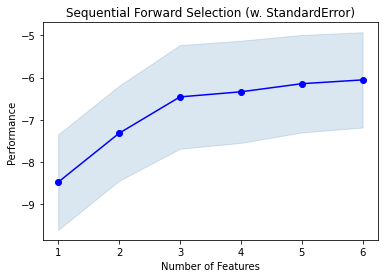

In [61]:
fig=plot_sfs(sfs1.get_metric_dict(), kind='std_err')
plt.title('Sequential Forward Selection (w. StandardError)')
plt.show()

In [62]:
sfs1.k_feature_idx_

(0, 5, 13, 24, 26, 27)

In [63]:
sfs1.k_feature_names_

('TotalPop', 'Native', 'Poverty', 'OtherTransp', 'MeanCommute', 'Employed')

In [64]:
sfs1.k_score_

-6.055774018024157

In [66]:
OLS(y, add_constant(X[list(sfs1.k_feature_names_)])).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Unemployment   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     1008.
Date:                Tue, 06 Oct 2020   Prob (F-statistic):               0.00
Time:                        12:18:59   Log-Likelihood:                -7396.5
No. Observations:                3218   AIC:                         1.481e+04
Df Residuals:                    3211   BIC:                         1.485e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           5.3546      0.612      8.743      0.000       4.154       6.555
TotalPop        0.5462      0.031     17.501      0.000       0.485       0.607
Native          0.0615      0.006      9.516      0.000       0.049       0.074
Poverty         0.2039      0.008     26.328      0.000       0.189       0.219
OtherTransp     0.1987      0.028      7.174      0.000       0.144       0.253
MeanCommute     0.1034      0.009     12.004      0.000       0.086       0.120
Employed      -21.5788      0.965    -22.351      0.000     -23.472     -19.686
==============================================================================
Omnibus:                      410.723   Durbin-Watson:                   1.766
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3116.961
Skew:                           0.354   Prob(JB):                         0.00
Kurtosis:                       7.769   Cond. No.                         824.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
estimator=LinearRegression()
sfs1=sfs(estimator, 
         k_features=6, 
         forward=False, 
         floating=True, 
        )

In [68]:
sfs1.fit(X,y)
sfs1.get_metric_dict()

{32: {'feature_idx': (0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21,
   22,
   23,
   24,
   25,
   26,
   27,
   28,
   29,
   30,
   31),
  'cv_scores': array([0.42137685, 0.65571364, 0.69207244, 0.65715899, 0.65607133]),
  'avg_score': 0.616478650080081,
  'feature_names': ('TotalPop',
   'Women',
   'Hispanic',
   'White',
   'Black',
   'Native',
   'Asian',
   'Pacific',
   'Citizen',
   'Income',
   'IncomeErr',
   'IncomePerCap',
   'IncomePerCapErr',
   'Poverty',
   'ChildPoverty',
   'Professional',
   'Service',
   'Office',
   'Construction',
   'Production',
   'Drive',
   'Carpool',
   'Transit',
   'Walk',
   'OtherTransp',
   'WorkAtHome',
   'MeanCommute',
   'Employed',
   'PrivateWork',
   'PublicWork',
   'SelfEmployed',
   'FamilyWork'),
  'ci_bound': 0.12663995399345263,
  'std_dev': 0.09853018658237142,
  'std_err': 0.0492650932911857},
 31: {'feature_idx': (0,
   1,
  

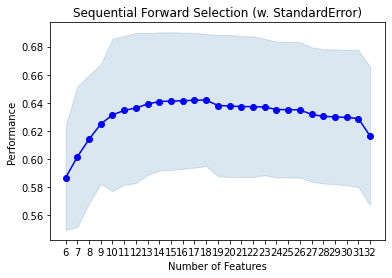

In [69]:
fig=plot_sfs(sfs1.get_metric_dict(), kind='std_err')
plt.title('Sequential Forward Selection (w. StandardError)')
plt.show()

In [70]:
sfs1.k_feature_names_

('White', 'Professional', 'Construction', 'Walk', 'MeanCommute', 'Employed')

In [91]:
model_3=OLS(y, add_constant(X[list(sfs1.k_feature_names_)])).fit().summary()
model_3

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Unemployment   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     867.6
Date:                Tue, 06 Oct 2020   Prob (F-statistic):               0.00
Time:                        12:47:50   Log-Likelihood:                -7550.3
No. Observations:                3218   AIC:                         1.511e+04
Df Residuals:                    3211   BIC:                         1.516e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           27.2226      0.472     57.695      0.000      26.298      28.148
White           -0.0488      0.002    -22.113      0.000      -0.053      -0.045
Professional    -0.0736      0.009     -8.503      0.000      -0.091      -0.057
Construction    -0.2140      0.012    -18.232      0.000      -0.237      -0.191
Walk             0.1353      0.014      9.816      0.000       0.108       0.162
MeanCommute      0.1197      0.009     13.362      0.000       0.102       0.137
Employed       -31.8322      0.835    -38.103      0.000     -33.470     -30.194
==============================================================================
Omnibus:                      433.659   Durbin-Watson:                   1.726
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4872.785
Skew:                           0.197   Prob(JB):                         0.00
Kurtosis:                       9.015   Cond. No.                     1.72e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.72e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Embeded

In [72]:
from sklearn.linear_model import RidgeCV, LassoCV

In [73]:
selector4=LassoCV()
selector4.fit(X,y)

LassoCV()

In [74]:
print('best alpha is', selector4.alpha_)
print('best R2 is', selector4.score(X,y))

best alpha is 0.09493082767478582
best R2 is 0.6333230887766529


In [75]:
coef=pd.Series(selector4.coef_, index=X.columns)

In [76]:
sns.set()

<AxesSubplot:>

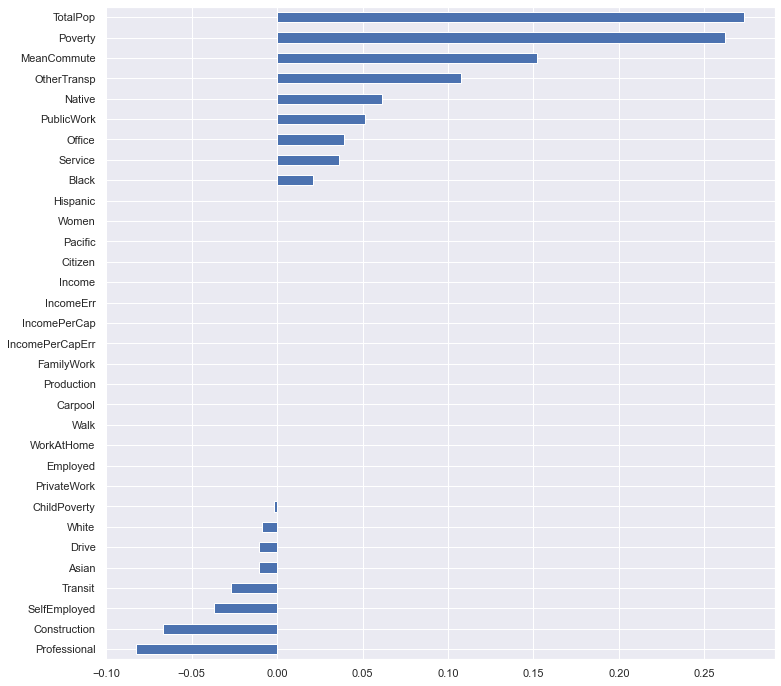

In [77]:
coef.sort_values().plot.barh(figsize=(12,12))

In [78]:
coef.Pacific

-0.0

In [79]:
selector5=RidgeCV()

In [81]:
selector5.fit(X,y)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]))

In [82]:
print('best alpha is', selector5.alpha_)
print('best R2 is', selector5.score(X,y))

best alpha is 0.1
best R2 is 0.6888126632027126


In [83]:
coef=pd.Series(selector5.coef_, index=X.columns)

<AxesSubplot:>

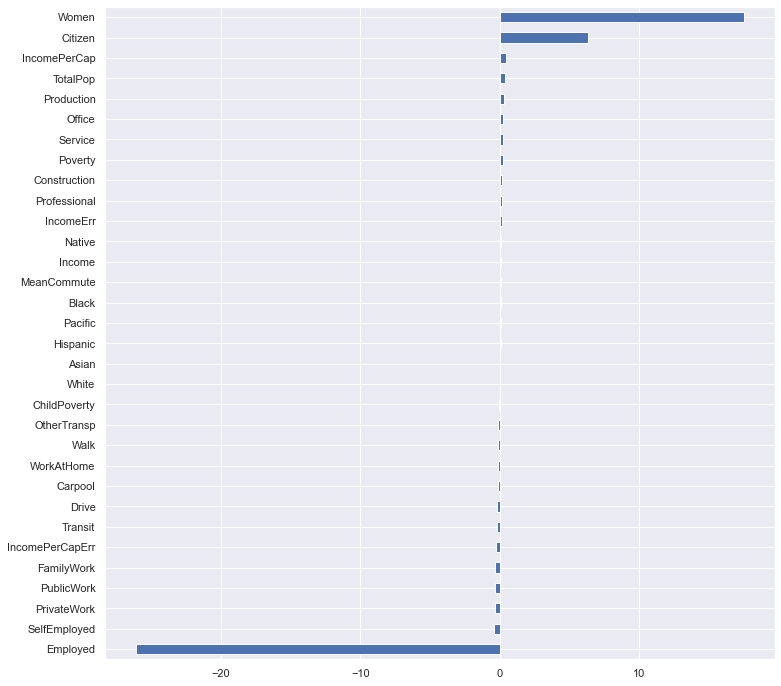

In [84]:
coef.sort_values().plot.barh(figsize=(12,12))

In [85]:
selector5.predict(X)

array([ 7.97142939,  8.19673103, 12.38209633, ..., 18.91393149,
       20.71380373, 20.17808198])

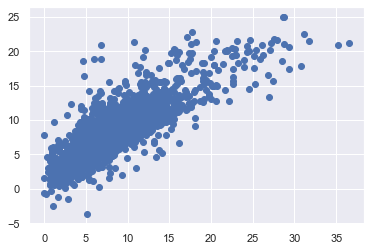

In [86]:
plt.scatter(y, selector5.predict(X))

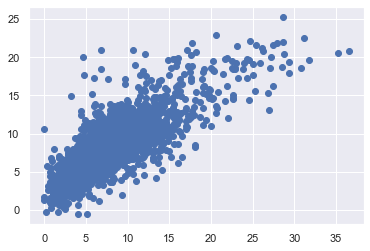

In [87]:
plt.scatter(y, selector4.predict(X))

In [88]:
def rmse(actual, pred):
    return ((actual-pred)**2).mean()**0.5

In [89]:
rmse(y, selector5.predict(X))

2.282912384869487

In [90]:
rmse(y, selector4.predict(X))

2.478107079544108